# Cifar10 데이터셋 딥러닝

## 환경 설정

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

## 데이터 불러오기 및 검증 데이터 분리

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170500096/170498071 [==============================] - 14s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


## 데이터 class_name 지정 및 시각화

In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

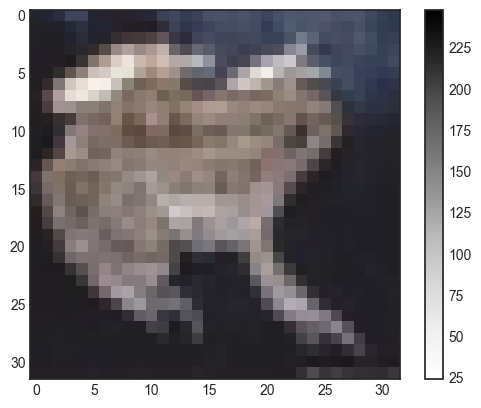

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


## 텐서플로우 데이터 reshape

In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(len(x_train), 32*32*3)
x_val = x_val.reshape(len(x_val), 32*32*3)
x_test = x_test.reshape(len(x_test), 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


## 데이터 정규화

정규화는 각 픽셀 값을 255로 나누어서 데이터를 [0, 1] 범위로 스케일링

표준화는 평균을 빼고 표준 편차로 나누는 것

In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

## 모델 컴파일 및 훈련

In [14]:
from tensorflow.keras import callbacks
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
check_point_cb = callbacks.ModelCheckpoint('best_model.h5', svae_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2563 - accuracy: 0.2445 - val_loss: 1.9445 - val_accuracy: 0.3244
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9249 - accuracy: 0.3092 - val_loss: 1.8496 - val_accuracy: 0.3675
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8533 - accuracy: 0.3372 - val_loss: 1.8247 - val_accuracy: 0.3744
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8097 - accuracy: 0.3535 - val_loss: 1.7590 - val_accuracy: 0.4013
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7785 - accuracy: 0.3646 - val_loss: 1.7552 - val_accuracy: 0.3995
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7532 - accuracy: 0.3717 - val_loss: 1.7029 - val_accuracy: 0.4138
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7451 - accuracy: 0.3756 - val_loss: 1.7551 - val_accuracy:

## 모델 loss, accuracy 시각화

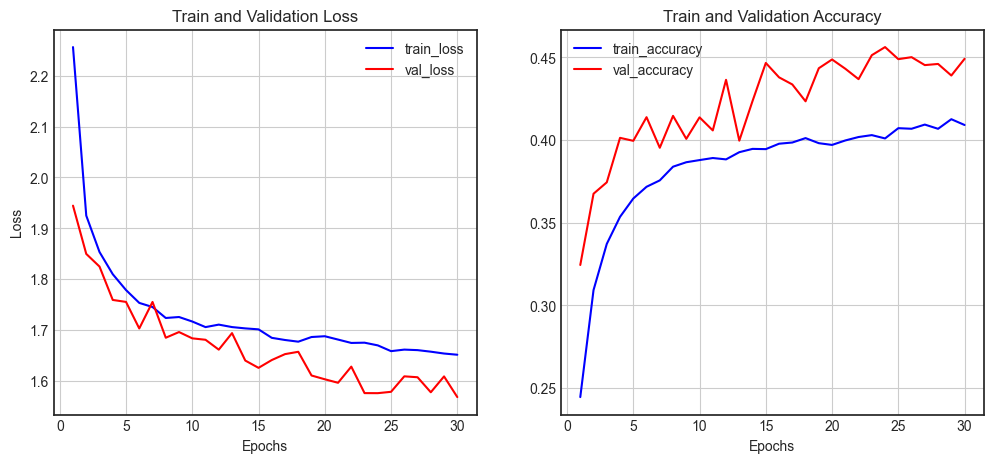

In [15]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가

In [16]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5663 - accuracy: 0.4471


[1.5663031339645386, 0.4471000134944916]

## 회고

시각화 부분을 직접 구현하라고 했었을 때, 원래 썼던 코드를 보면서 하나하나 쳐보면서 구현을 했었다. 시각화 부분이 제일 어렵다고 느껴졌다.
과거 과정에서 직접 린스페이스를 써서 했었을 때는 1도 이해 안되고 왜 이렇게 까지 하나 했었다, 다행히 여기서는 구현 하는방법을 조금 쉽게
해줘서 다행이였고, 이렇게 시각화를 해서 보면 제대로 학습되었는지 알 수 있었다.
원래 CNN 구성으로 했어야 했던 모델이여서 현재 방식으로하면 특징들을 추출할 수 없어서 정확성이 매우 떨어지는 것을 알 수 있었다.
특징 1도 없이 바로 flatten 을 해서 추출해서 낮은 것으로 확인
노드가 밀렸어서 여기까지 해결할 수 없을줄 알았는데 새벽 일찍 일어나서 노드를 추가 진행하고 마무리를 지을 수 있어서 정말 다행이였다.

그리고 총합적으로 오늘 아침에 가상환경을 구축 성공하여 로컬에서 코드를 돌릴 수 있게 되어서 정말 보람찬 하루였다.
- **K**
    - 동영상에 나온 레이어층을 바로 구현 성공
    - 원 핫 인코딩을 하지 않았기에 바로 sparse_categorical_crossentropy를 써야 하는 것을 알음
- **P**
    - 시각화 구현 코드를 계속 붙여넣기 하거나 만들어져 있어서 대충 본 것이 문제
- **T**
    - 코드를 보면서 직접 하나하나 치면서 이해를 해나가고 있음